## 신경망 모델
#### - 이진 분류: 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [3]:
cancer_std = StandardScaler().fit_transform(cancer.data)

#### 1. 데이터를 정규/표준화 하지 않은 경우

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

In [6]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 설정(컴파일)

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

- 모델 학습

In [8]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,       # 학습중 검증용
                    epochs=100,                 # 반복 횟수
                    batch_size=100)             # 동시에 몇개의 데이터를 메모리에 로드하는가

Epoch 1/100
4/4 [==============================] - 1s 83ms/step - loss: 47.5342 - accuracy: 0.3599 - val_loss: 28.6674 - val_accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 21.9735 - accuracy: 0.3599 - val_loss: 6.5540 - val_accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 5.1341 - accuracy: 0.4588 - val_loss: 12.6227 - val_accuracy: 0.5714
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 9.3422 - accuracy: 0.6401 - val_loss: 4.8896 - val_accuracy: 0.5934
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 2.0324 - accuracy: 0.5852 - val_loss: 3.8085 - val_accuracy: 0.4286
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 3.5060 - accuracy: 0.3626 - val_loss: 0.7508 - val_accuracy: 0.6484
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7071 - accuracy: 0.7967 - val_loss: 2.0882 - val_accuracy: 0.6703
Epoch 8/100
4/4 

- 모델 평가

In [9]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9474


[0.16101989150047302, 0.9473684430122375]

- 훈련과정 시각화
    - epoch에 따른 accuracy, val_loss의 변화

In [10]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

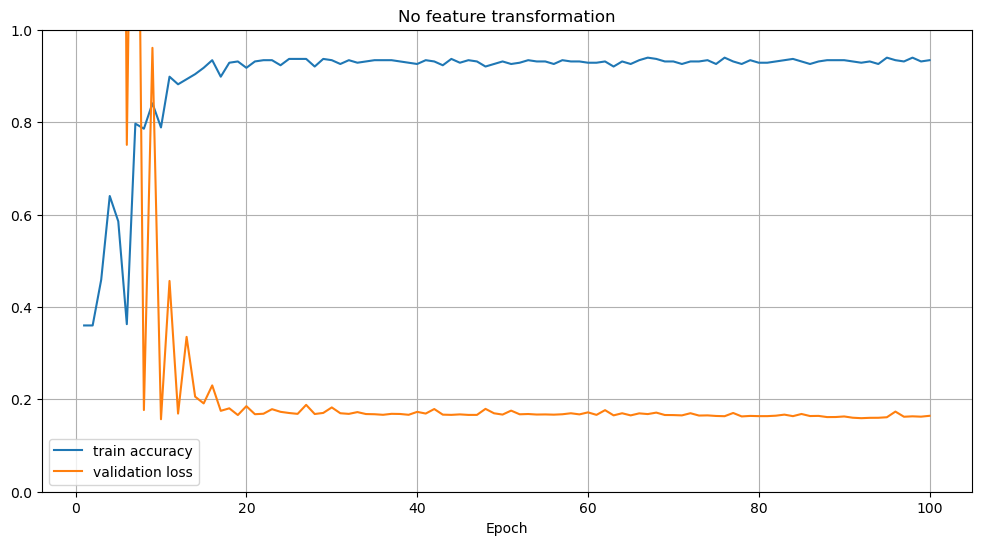

In [11]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1]), plt.xlabel('Epoch')
plt.title('No feature transformation')
plt.show()

#### 2. 데이터를 표준화한 경우

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

In [13]:
# 모델 정의
model2 = Sequential()
model2.add(Dense(100, input_shape=(30,), activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 모델 컴파일
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [15]:
# 모델 학습
history2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                      epochs=100, batch_size=100, verbose=0)

In [16]:
# 모델 평가
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.2826 - accuracy: 0.9561


[0.2825841009616852, 0.9561403393745422]

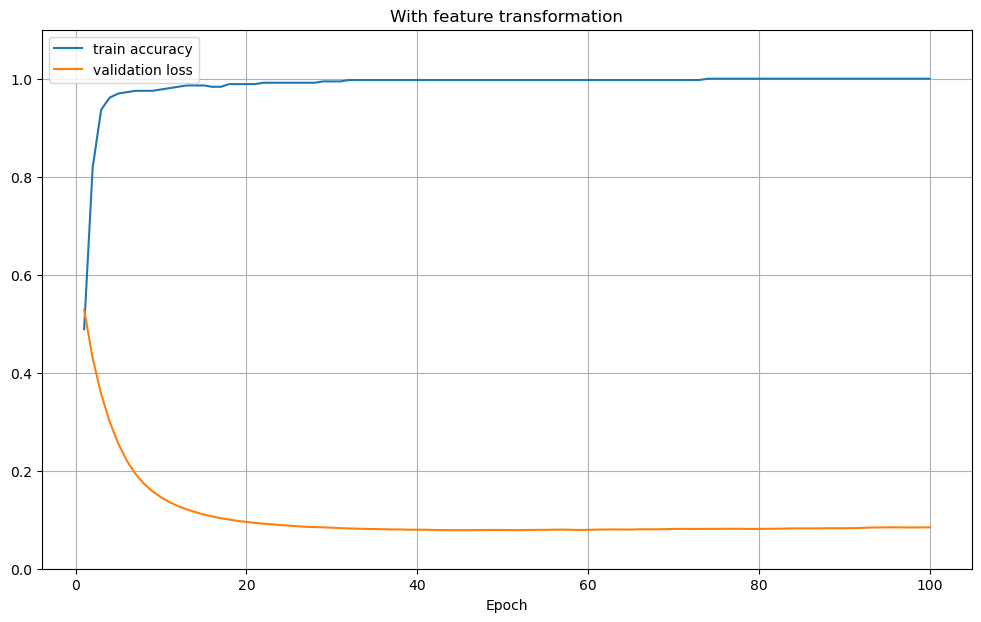

In [17]:
# 학습과정 시각화
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']

plt.figure(figsize=(12,7))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.1]), plt.xlabel('Epoch')
plt.title('With feature transformation')
plt.show()